In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import math
from ngboost import NGBRegressor

## Génération des variables

In [3]:
n_samples=10000
µ = np.random.uniform(0,1,n_samples)
sigma = np.random.uniform(0,1,n_samples)
Parameters = np.stack([µ,sigma]).T
y = np.array([np.random.normal(*p,size=1) + np.random.normal(0,0.02) for p in Parameters])

## Paramétrisation

In [4]:
X = np.stack([µ,sigma]).T

X_train, X_test, y_train, y_test = train_test_split(X,y)

## Entraînement

In [5]:
def train_model(max_depth=3,n_estimators=500,ordinary_gradient=False,early_stopping_rounds=None) :
    tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=max_depth)

    if ordinary_gradient :
        model = NGBRegressor(Base=tree,n_estimators=n_estimators,natural_gradient=False)
    else :
        model = NGBRegressor(Base=tree,n_estimators=n_estimators)

    if early_stopping_rounds is not None :
        model.fit(X_train,y_train,
                  X_val=X_test,
                  Y_val=y_test,
                  early_stopping_rounds=early_stopping_rounds
                )
    else :
        model.fit(X_train,y_train,
                  X_val=X_test,
                  Y_val=y_test
                )
    
    return model

model_0 = train_model(ordinary_gradient=True,n_estimators=500)
model_1 = train_model(n_estimators=500)

c:\Users\natha\Documents\machine_learning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\natha\Documents\machine_learning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[iter 0] loss=0.9875 val_loss=0.9675 scale=0.5000 norm=0.8618
[iter 100] loss=0.7262 val_loss=0.7286 scale=0.5000 norm=0.7481
[iter 200] loss=0.5542 val_loss=0.5788 scale=0.5000 norm=0.9233
[iter 300] loss=0.4938 val_loss=0.5340 scale=0.1250 norm=0.2689
[iter 400] loss=0.4739 val_loss=0.5229 scale=0.1250 norm=0.2831


c:\Users\natha\Documents\machine_learning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\natha\Documents\machine_learning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[iter 0] loss=0.9875 val_loss=0.9636 scale=2.0000 norm=1.5878
[iter 100] loss=0.6165 val_loss=0.6294 scale=2.0000 norm=1.3331
[iter 200] loss=0.4891 val_loss=0.5256 scale=2.0000 norm=1.3347
[iter 300] loss=0.4511 val_loss=0.5022 scale=1.0000 norm=0.6718
[iter 400] loss=0.4400 val_loss=0.5003 scale=1.0000 norm=0.6745


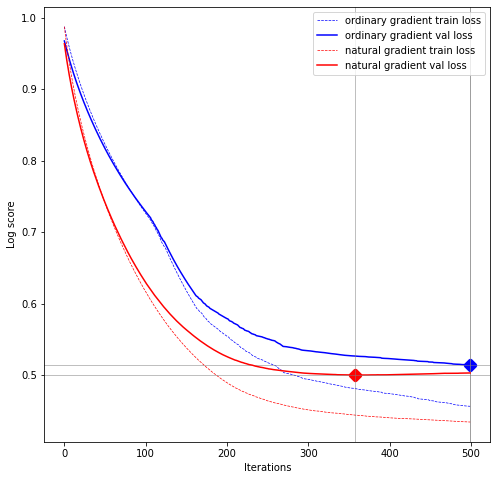

In [6]:
def plot_training(model_ordinary_gradient, model_natural_gradient) :
    val_0 = np.array(model_ordinary_gradient.evals_result['val']['LOGSCORE'])
    train_0 = np.array(model_ordinary_gradient.evals_result['train']['LOGSCORE'])
    val_1 = np.array(model_natural_gradient.evals_result['val']['LOGSCORE'])
    train_1 = np.array(model_natural_gradient.evals_result['train']['LOGSCORE'])
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(train_0,'--',color='blue',linewidth=0.7,label='ordinary gradient train loss')
    ax.plot(val_0,color='blue',label='ordinary gradient val loss')
    ax.scatter(val_0.argmin(),val_0.min(),color='blue',marker='D',linewidths=5)
    ax.axvline(x=val_0.argmin(),color='grey',linewidth=0.5)
    ax.axhline(y=val_0.min(),color='grey',linewidth=0.5)
    ax.axvline(x=val_0.argmin(),color='grey',linewidth=0.5)
    ax.plot(train_1,'--',color='red',linewidth=0.7,label='natural gradient train loss')
    ax.plot(val_1,color='red',label='natural gradient val loss')
    ax.scatter(val_1.argmin(),val_1.min(),color='red',marker='D',linewidths=5)
    ax.axvline(x=val_1.argmin(),color='grey',linewidth=0.5)
    ax.axhline(y=val_1.min(),color='grey',linewidth=0.5)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Log score')
    ax.legend(loc='upper right')
    plt.show()

plot_training(model_0,model_1)